## COVID-19 District Analysis:
Here you can analyse COVID-19 in any district of India. Data is from: [covid19india.org](https://www.covid19india.org) and you can download csv file from this [API link](https://https://api.covid19india.org/csv/latest/districts.csv). If there is any problem in visualization you can check all the district names [here](https://drive.google.com/file/d/1AkbDTghdlIzSb_PZPiaz0P0WIVhiNqCC/view?usp=sharing). You just need to input the name of the district after running the following cell.

In [1]:
import pandas as pd
 
#Loading dataset
df = pd.read_csv('https://api.covid19india.org/csv/latest/districts.csv', parse_dates=['Date'], index_col='Date')

In [8]:
# Getting district data
DTNAME = input('Enter District name:')
state_df = df.loc[df['District'] == DTNAME, :]

Enter District name:Kolkata


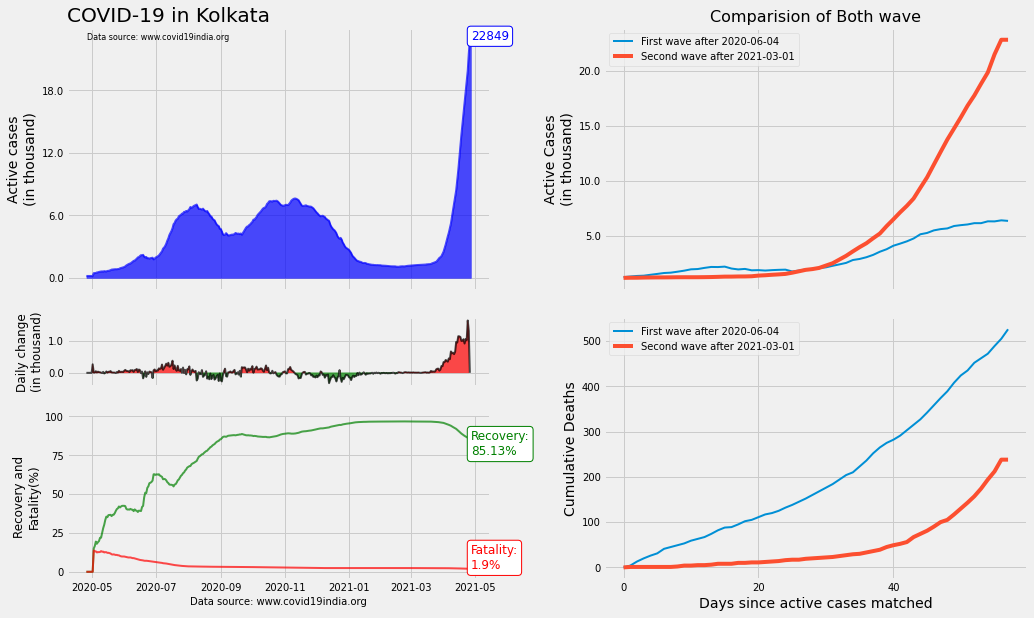

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.style.use('fivethirtyeight')
 
def to_thousands(x, pos):
    return (x/1000)
 
######################## Data Processing #########################
#ax1
active = state_df['Confirmed'] - (state_df['Recovered'] + state_df['Deceased'])
 
# #ax2
# daily_conf = state_df['Confirmed'].shift(-1) - state_df['Confirmed']
# daily_conf.drop(daily_conf.tail(2).index, inplace=True)
# daily_recv = state_df['Recovered'].shift(-1) - state_df['Recovered']
# daily_recv.drop(daily_recv.tail(2).index, inplace=True)
# daily_death = state_df['Deceased'].shift(-1) - state_df['Deceased']
# daily_death.drop(daily_death.tail(2).index, inplace=True)
# change = daily_conf - (daily_recv + daily_death)
 
#ax2New
change = active.shift(-1) - active
 
#ax3
r_rate = (state_df['Recovered'] / state_df['Confirmed'])*100
f_rate = (state_df['Deceased'] / state_df['Confirmed'])*100
# daily_positive = state_df['Confirmed'] / state_df['Tested'] * 100
 
#ax31
# daily_test = (state_df['Tested'].shift(-1) - state_df['Tested']) / state_df['Tested'].shift(-1)*100
# daily_test.drop(daily_test.tail(1).index, inplace=True)
 
#ax3, ax31, ax4
# total_conf = state_df['Confirmed']
 
#ax4, ax5
state_df = state_df.assign(act = state_df['Confirmed'] - (state_df['Recovered'] + state_df['Deceased']))
new_year = pd.to_datetime('2021-01-01', yearfirst=True)
second_after = pd.to_datetime('2021-03-01', yearfirst=True)
start_cases = active[second_after]
first_before = pd.to_datetime('2020-08-01', yearfirst=True)
range_from = start_cases*0.95
range_to = start_cases*1.05
match_df = state_df[(state_df.index < first_before) & (state_df.act < range_to) & (state_df.act > range_from)]
 
if len(match_df) < 1:
    first_after = pd.to_datetime('2020-04-30', yearfirst=True)
else:
    first_after = match_df.index[0]
    
first_wave = state_df[(state_df.index > first_after) &
                      (state_df.index < second_after)][['act', 'Deceased']].reset_index()
second_wave = state_df[(state_df.index >= second_after)][['act', 'Deceased']].reset_index()
first_wave['Date'] = pd.to_datetime(first_wave['Date']).dt.date
first_wave['Deceased'] = first_wave['Deceased'] - first_wave['Deceased'][0]
second_wave['Deceased'] = second_wave['Deceased'] - second_wave['Deceased'][0]
 
 
###################### Data Visualization #########################
# Defining axes
fig, axes = plt.subplots(figsize=(15,9))
ax1 = plt.subplot2grid((6,2),(0,0), rowspan=3, colspan=1)
plt.ylabel('Active cases\n(in thousand)', fontsize=14)
plt.title('COVID-19 in '+DTNAME, loc='left')
 
ax2 = plt.subplot2grid((6,2),(3,0), rowspan=1, colspan=1, sharex=ax1)
plt.ylabel('Daily change\n(in thousand)', fontsize=12)
 
##ax31 = ax3.twinx()
##ax31.set_ylabel('Daily tests (in thousands)', fontsize=14, color='b')
ax3 = plt.subplot2grid((6,2),(4,0), rowspan=2, colspan=1, sharex=ax1)
plt.xlabel('Data source: www.covid19india.org', fontsize=10)
plt.ylabel('Recovery and\nFatality(%)', fontsize=12)
 
ax4 = plt.subplot2grid((6,2),(0,1), rowspan=3, colspan=1)
plt.title('Comparision of Both wave', fontsize=16)
plt.ylabel('Active Cases\n(in thousand)', fontsize=14)
 
ax5 = plt.subplot2grid((6,2),(3,1), rowspan=3, colspan=1, sharex=ax4)
plt.xlabel('Days since active cases matched', fontsize=14)
plt.ylabel('Cumulative Deaths', fontsize=14)
 
# Annotation boxes for plotting last value ticker
bbox_black = dict(boxstyle='round',fc='w', ec='b',lw=1)
bbox_green = dict(boxstyle='round',fc='w', ec='g',lw=1)
bbox_red = dict(boxstyle='round',fc='w', ec='r',lw=1)
 
# Active cases plot
ax1.plot(active.index, active, color='b', linewidth=2, alpha=0.7)
ax1.fill_between(active.index, 0, active, facecolor='b', edgecolor='b', alpha=0.7)
ax1.annotate(str(active[-1]), (active.index[-1], active[-1]), fontsize=12,
             xytext = (active.index[-1],active[-1]), color='b', bbox=bbox_black)
ax1.annotate('Data source: www.covid19india.org', (active.index[1], active.max()), fontsize=8)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(to_thousands))
ax1.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='lower'))
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=10)
 
# Change in acive cases plot
ax2.plot(change.index, change, linewidth=2, color='k', alpha=0.7)
ax2.fill_between(change.index, 0, change, where=(change>0)
                 , facecolor='r', edgecolor='r', alpha=0.7)
ax2.fill_between(change.index, 0, change, where=(change<0)
                 , facecolor='g', edgecolor='g', alpha=0.7)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(to_thousands))
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), fontsize=10)
 
# Recovery and fatality rate plot
ax3.plot(state_df.index, r_rate, linewidth=2, color='g', alpha=0.7)
ax3.plot(state_df.index, f_rate, linewidth=2, color='r', alpha=0.7)
ax3.annotate('Recovery:\n'+str(round(r_rate[-1],2))+'%',
             (state_df.index[-1], r_rate[-1]), color='g', fontsize=12,
             xytext = (state_df.index[-1],r_rate[-1]-10), bbox=bbox_green)
ax3.annotate('Fatality:\n'+str(round(f_rate[-1],2))+'%',
             (state_df.index[-1], f_rate[-1]), color='r', fontsize=12,
             xytext = (state_df.index[-1],f_rate[-1]), bbox=bbox_red)
ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='lower'))
plt.setp(ax3.get_yticklabels(), fontsize=10)
plt.setp(ax3.get_xticklabels(), fontsize=10)
 
# Comparision of active cases plot
ax4.plot(first_wave.iloc[: len(second_wave)]['act'], linewidth=2,
         label='First wave after {}'.format(first_wave['Date'][0]))
ax4.plot(second_wave['act'], label='Second wave after 2021-03-01')
ax4.yaxis.set_major_formatter(mticker.FuncFormatter(to_thousands))
ax4.legend(fontsize=10)
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), fontsize=10)
 
# Comparision of cumulative deaths plot
ax5.plot(first_wave['Deceased'].iloc[: len(second_wave)],
         label='First wave after {}'.format(first_wave['Date'][0]), linewidth=2)
ax5.plot(second_wave['Deceased'], label='Second wave after 2021-03-01')
ax5.legend(fontsize=10)
ax5.xaxis.set_major_locator(mticker.MaxNLocator(4, prune='lower'))
plt.setp(ax5.get_yticklabels(), fontsize=10)
plt.setp(ax5.get_xticklabels(), fontsize=10)
 
plt.subplots_adjust(left=0.086, bottom=0.079, right=0.975, top=0.93, wspace=0.27, hspace=0.4)
plt.show()